We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [4]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-06-04 11:49:03--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:e00:1d:d83a:40c0:93a1, 2600:9000:21c7:fc00:1d:d83a:40c0:93a1, 2600:9000:21c7:c00:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:e00:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [5]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [6]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-30,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-26,26,5,2020,591,1,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [7]:
df.count()

dateRep                    21338
day                        21338
month                      21338
year                       21338
cases                      21338
deaths                     21338
countriesAndTerritories    21338
geoId                      21338
countryterritoryCode       21102
popData2018                21027
continentExp               21338
dtype: int64

We pivot to a country by column format.

In [8]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-31   0.0  726.0  866.0  0.0  0.0  23.0  251.0  7.0  795.0  44.0  ...   
2020-06-01   0.0  661.0  680.0  0.0  0.0  15.0  355.0  2.0  637.0   4.0  ...   
2020-06-02   1.0  635.0  545.0  0.0  0.0   6.0  210.0  0.0  564.0  21.0  ...   
2020-06-03  79.0  596.0  759.0  0.0  0.0  21.0  517.0  0.0  904.0  11.0  ...   
2020-06-04   7.0  571.0  758.0  1.0  0.0  20.0  515.0  0.0  949.0  31.0  ...   

           deaths                                                 
geoId          VC   VE   VG   VI   VN   XK    YE    ZA   ZM   ZW  
dateRep                                                           
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  
2020-05-31    0.0  0.0  0.0  0.0  0.0  0.0  11.0  32.0  0.0  0.0  
2020-06-01    0.0  0.0  0.0  0.0  0.0  0.0   3.0  40.0  0.0  0.0  
2020-06-02    0.0  3.0  0.0  0.0  0.0  0.0   4.0  22.0  0.0  0.0  
2020-06-03    0.0  1.0  0.0  0.0  0.0  0.0   3.0  50.0  0.0  0.0  
2020-06-04    0.0  2.0  0.0  0.0  0.0  0.0   1.0  37.0  0.0  0.0  

[157 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [9]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-05-31   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-01   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-02   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-03   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-04   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-05-31 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-01 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-02 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-03 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-04 NaN  NaN NaN NaN NaN NaN NaN  

[522 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [10]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    522.000000
mean     260.500000
std      150.832689
min        0.000000
25%      130.250000
50%      260.500000
75%      390.750000
max      521.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach, selecting country and measure and columns to creat for smoothed and predicted measures.

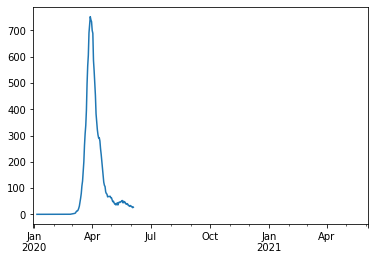

In [23]:
country  = 'AT'
measure  = 'cases'
smeasure = 'scases'
pmeasure = 'pcases'

df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()

df_pred = pd.DataFrame({
    'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
df_pred[measure].plot()

The typical progress of an outbreak is assumed to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(- (x - mu) / beta))`, where `mu` is the location parameter and `beta` the scale parameter.

In [24]:
def gumbelval(x, beta, mu):
    """Return the Gumbel CDF for x according to beta and mu"""
    return np.exp(- np.exp(- (x - mu) / beta))

def gumbelinv(x):
    """Inverse Gumbel function"""
    return(- np.log(- np.log(x)))

To ignore early outbreaks and long tails, we define the minimum case count as one in million and find the current total number of cases for scaling.

In [25]:
popdata  = df[df['geoId'] == country]['popData2018'].iloc[0]
mincases = popdata / 1e6
numcases = df_pred[measure].sum()
print(mincases, numcases)

8.847037 16637.0


From our dataframe we select only the days with cases above the minimum and create a column with cumulative data for fitting the Gumbel distribution, which is cumulative.

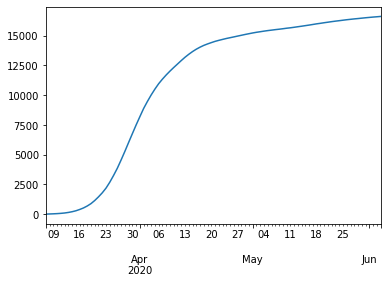

In [26]:
df_pred = df_pred[df_pred[measure] > mincases]
df_pred['cumul'] = df_pred[measure].cumsum()
df_pred['cumul'].plot()

For correct scaling of the data we need to find the current progress of the outbreak, in other words, what part of the distribution we wil try to fit. The function below takes a progress as input and determines the fit for that assumed amount of progress, returning the residuals of the fit as a measure to be minimized.

Preparing for the fit, we normalize our input and scale with the current number for progress. Preventing numerical errors we select cases below one, taking the double negative logarithm after we make sure the input is at least 10 measures, to prevent spurious fits. (Such as fitting a line on just two measures, which would be perfect but not relevant.)

In [27]:
from scipy.stats import linregress

def fitres(progress):
    """Try to fit a line according to progress, returning correlation of fit"""
    global df_pred, slope, intercept
    
    # Scale the cumulative measure and only keep cases below 1 for fitting
    df_pred['scaled'] = df_pred['cumul'] / numcases * progress
    df_fit = df_pred[df_pred['scaled'] < 1].copy()
    
    # Only try fitting if we have at least 5 measures left.
    if len(df_fit) > 4:
        df_fit['linear'] = gumbelinv(df_fit['scaled'])
        slope, intercept, rvalue, pvalue, stderr = linregress(df_fit[['daynum', 'linear']])
        print('Progress {:7.3f}% rsquared {:8.6f} for {:3.0f} measures'.format(
            progress * 100, rvalue ** 2, len(df_fit)))
        return(1 - rvalue)
    else:
        return np.nan

An optimizer can call the function repeatedly to find the input that returns the best output. In this case `minimize` will find the progress that returns the lowest residuals, indicating the best fit. We use the `bound` method of `minimize_scalar` to find the minimum value. We assume at least 10% progress in the outbreak and allow for fitting on data where the first wave is already finished, to a maximum of 150%.

In [28]:
from scipy.optimize import minimize_scalar

optim = minimize_scalar(fitres, method='bounded', bounds=(0, 1.5), options={'disp':2})

Progress  57.295% rsquared 0.766750 for  90 measures
Progress  92.705% rsquared 0.903438 for  90 measures
Progress 114.590% rsquared 0.953529 for  45 measures
Progress 140.393% rsquared 0.890233 for  33 measures
Progress 115.135% rsquared 0.924771 for  45 measures
Progress 104.117% rsquared 0.987250 for  72 measures
Progress  99.758% rsquared 0.974687 for  90 measures
Progress 105.430% rsquared 0.987429 for  68 measures
Progress 104.913% rsquared 0.978634 for  70 measures
Progress 108.929% rsquared 0.978420 for  56 measures
Progress 106.766% rsquared 0.986813 for  63 measures
Progress 105.075% rsquared 0.989678 for  69 measures
Progress 105.211% rsquared 0.981106 for  69 measures
Progress 105.013% rsquared 0.991491 for  69 measures
Progress 104.975% rsquared 0.961107 for  70 measures
Progress 105.037% rsquared 0.990879 for  69 measures
Progress 104.999% rsquared 0.926375 for  70 measures
Progress 105.022% rsquared 0.991267 for  69 measures
Progress 105.008% rsquared 0.991623 for  69 me

The optimization gives detailed results, such as the best result in `fun`, the number of iterations in `nfev` and the optimal input in `x`. That number represents the progress, e.g. a result of `0.77` would mean that we estimate the outbreak at 77% of total cases for the current wave. We call `fitres` one more time to obtain the fit for the best value of progress.

In [29]:
print(optim)
progress = optim.x
rsquared = (1 - optim.fun) ** 2
bestfit  = fitres(progress)

     fun: 0.004157068364695982
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 1.050043867797959
Progress 105.004% rsquared 0.991703 for  69 measures


The `scaled` column contains the scaled cumulative distribution that should approach the correct part of a gumbel cumulative distribution for values below 1.

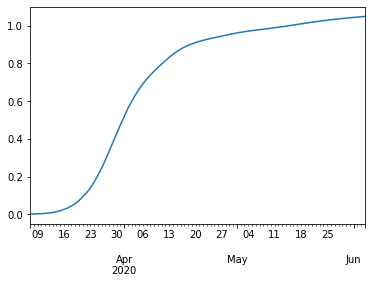

In [30]:
df_pred['scaled'].plot()

We can check the fit with `polyval`, applying the linear factors to the input column with day numbers and plotting both `linear` and `fitted` for a visual check.

Slope 0.101712 with intercept at -8.980


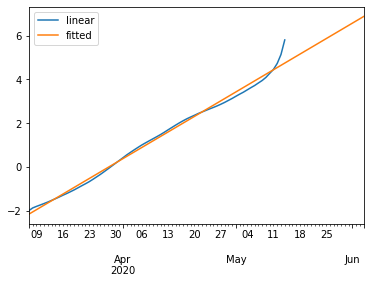

In [31]:
print('Slope {:1.6f} with intercept at {:1.3f}'.format(slope, intercept))
df_pred['linear'] = gumbelinv(df_pred[df_pred['scaled'] < 1]['scaled'])
df_pred['fitted'] = slope * df_pred['daynum'] + intercept
df_pred[['linear', 'fitted']].plot()

From slope and intercept of this line we calculate beta and mu of the Gumbel distribution by converting `y = ax + b` to `y = (x - mu) / beta`, where `beta = 1 / a` and `mu = -b / a`.

In [32]:
beta = 1 / slope
mu = - intercept / slope
print('Gumbel beta {:1.3f} with mu at {:1.0f}'.format(beta, mu))

Gumbel beta 9.832 with mu at 88


Finished fitting, now back to the original data! We apply the Gumbel function to `daynum` and scale the result back to the number of cases according to the estimated progress. The result is the CDF, so we reduce that to the PDF by taking the gradient. To visually check the fit, we plot the cumulative curves.

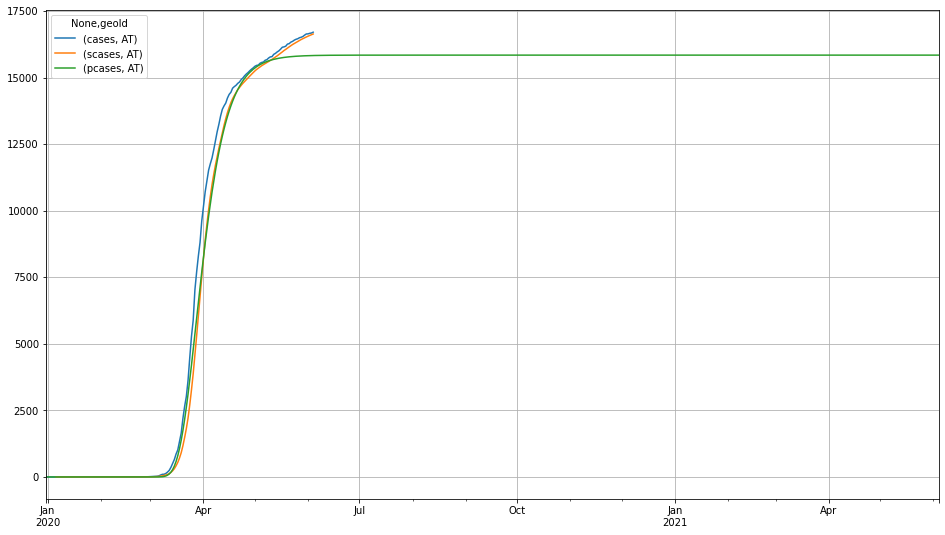

In [33]:
df_geo[(pmeasure, country)] = np.gradient(gumbelval(df_geo['daynum'], beta, mu) * numcases / progress)
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
    figsize=(16, 9), grid=True)

We have the daily new case data in our dataframe.

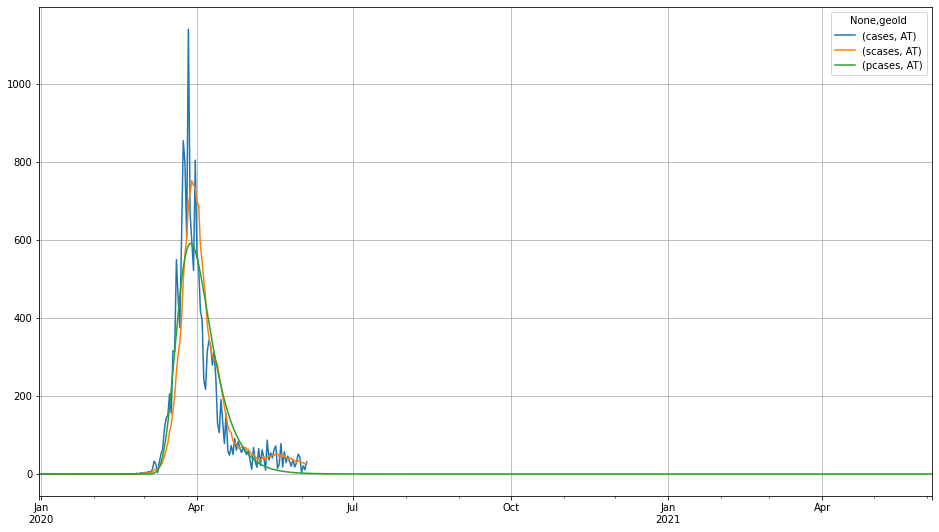

In [34]:
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
    figsize=(16, 9), grid=True)

The sum of our data would be the estimated total number, which should match the current number of cases and estimated progress.

In [35]:
final = df_geo[pmeasure][country].sum()
print('Final of {:1.0f} from an optimization estimate of {:1.0f}'.format(final, numcases / progress))

Final of 15844 from an optimization estimate of 15844


The peak can be found at the first predicted value that is larger than the next.

In [36]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-03-28


This date should match the `mu` of our distribution, in days since the start of the index.

In [37]:
df_geo.loc[df_geo['daynum'] == mu.astype(int)].index

DatetimeIndex(['2020-03-28'], dtype='datetime64[ns]', freq='D')

The floor is defined as the first time that the number of reported cases falls below 1 in a million, which is the first time that happens *after* the peak.

In [38]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) & (
    df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-05-19


Similarly, we can calculate the start as the first day where the number of cases was above 1 in a million before the peak.

In [39]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) & (
    df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-09


We define the maximum delta as the day in the curve with the sharpest rise.

In [40]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 50 on 2020-03-19


This should match the maximum gradient of the daily data.

In [41]:
print('Maximum gradient is {:1.0f}'.format(np.gradient(df_geo[(pmeasure, country)]).max()))

Maximum gradient is 50


Back to the original curve, showing the number of infected concurrently.

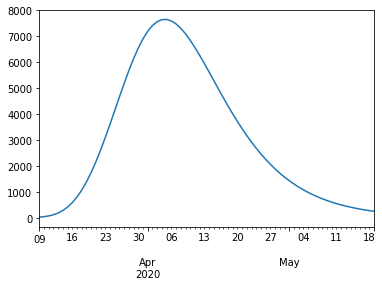

In [42]:
df_geo[pmeasure][country].rolling(14).sum().loc[start:floor].plot()

The top of this curve gives the maximum number of people that are infected at the same time.

In [43]:
print('Maximum infected is {:1.0f}'.format(df_geo[pmeasure][country].rolling(14).sum().max()))

Maximum infected is 7645


If we look at the difference between our actual (smoothed) value and our prediction, we can try to determine if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

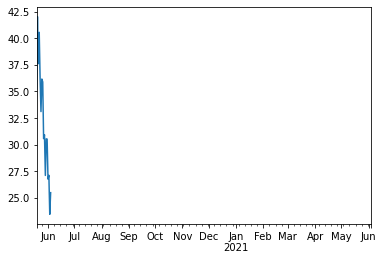

In [44]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).loc[floor:].plot()

Keep exploring! Stay home, wash your hands, keep your distance.